In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('data/cars.csv')
df.columns = ['speed', 'dist']
df

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


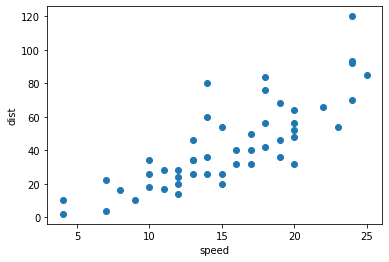

In [6]:
plt.xlabel('speed')
plt.ylabel('dist')
plt.scatter(df['speed'], df['dist'])
plt.show()

In [7]:
x = tf.placeholder( tf.float32)
y = tf.constant( df['dist'], tf.float32)

In [8]:
w = tf.Variable(tf.random_uniform([1]))
b = tf.Variable(tf.random_uniform([1]))

In [16]:
hx = w*x + b
cost = tf.reduce_mean(tf.square(hx-y))

In [17]:
optimizer = tf.train.GradientDescentOptimizer(0.001) #learning mate
train = optimizer.minimize(cost)

In [18]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [19]:
for i in range(10000):
    sess.run(train,{x:df['speed']})
    if i%100==0:
        print(i, sess.run(cost,{x:df['speed']}))

0 651.2815
100 260.02844
200 258.6953
300 257.4161
400 256.18857
500 255.01073
600 253.8805
700 252.79605
800 251.75543
900 250.75688
1000 249.79869
1100 248.87935
1200 247.99715
1300 247.15067
1400 246.33842
1500 245.55899
1600 244.81117
1700 244.09355
1800 243.40488
1900 242.74414
2000 242.11014
2100 241.50177
2200 240.91805
2300 240.35793
2400 239.82043
2500 239.30467
2600 238.8098
2700 238.3349
2800 237.87926
2900 237.44203
3000 237.02245
3100 236.6199
3200 236.2337
3300 235.86295
3400 235.50728
3500 235.16603
3600 234.8386
3700 234.52434
3800 234.22285
3900 233.93353
4000 233.6559
4100 233.38953
4200 233.13391
4300 232.88863
4400 232.65327
4500 232.4275
4600 232.21078
4700 232.00285
4800 231.80331
4900 231.61188
5000 231.42816
5100 231.25186
5200 231.08275
5300 230.92043
5400 230.76471
5500 230.61528
5600 230.4719
5700 230.33426
5800 230.20227
5900 230.07559
6000 229.95406
6100 229.83739
6200 229.7255
6300 229.61801
6400 229.515
6500 229.4161
6600 229.3212
6700 229.23016
6800 229.

In [20]:
sess.run(w)

array([3.7978368], dtype=float32)

In [21]:
sess.run(b)

array([-15.268154], dtype=float32)

##### 자동차 속도가  30과 50일때 각각의 제동거리를 구하시오 

In [22]:
sess.run(hx,{x:[30,50]})

array([ 98.66695, 174.62369], dtype=float32)

#### 실측데이터는 scatter로 
#### 예측데이터는 라인그래프로 그려보시오

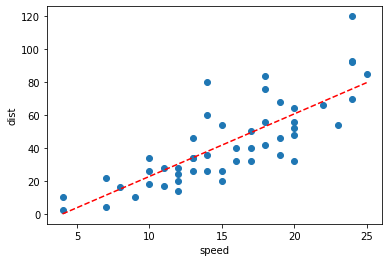

In [30]:
plt.xlabel('speed')
plt.ylabel('dist')
plt.scatter(df['speed'], df['dist'])
plt.plot( df['speed'], sess.run(hx, {x:df['speed']}),'r--')
plt.show()

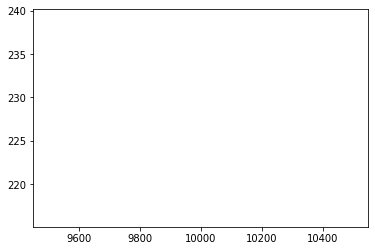

In [28]:
plt.plot(i, sess.run(cost,{x:df['speed']}))
plt.show()